In [82]:
import math

import pandas as pd  # table management
import numpy as np  # Matlab-like matrix operations

import plotly  # pretty interactive plots (on website)
import matplotlib.pyplot as plt  # quick plots
import seaborn as sns  # more pretty plots

import sklearn  # machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import logging  # logging info, warnings and errors

from pkg_resources import resource_listdir, resource_stream  # loading raw files

In [2]:
import coronus_web
from coronus_web.loading.frames import get_cases  # for loading preprocessed cases (already preprocessed)
from coronus_web.plotting.plots import plot_interactive_df  # for plotting a dataframe
from coronus_web.loading.download import get_frames
from coronus_web.loading.download import GEO_LEVELS, CASE_TYPES  # constants

In [74]:
import warnings
warnings.filterwarnings(action='once')

In [3]:
deaths = get_cases('country', 'deaths')

In [4]:
deaths.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
new_data = []
for col in deaths.columns:
    non_zero = deaths[col][deaths[col] > 5].reset_index(drop=True)
    if len(non_zero) >= 14:
        new_data.append(non_zero)

In [6]:
first_case_aligned = pd.concat(new_data, axis=1)
first_case_aligned.tail()

,Algeria,Australia,Austria,Belgium,Brazil,Canada,China,Denmark,Diamond Princess,Ecuador,...,Philippines,Poland,Portugal,San Marino,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
69,NaN,NaN,NaN,NaN,NaN,NaN,3309,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,3316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,3322,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,3326,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,3330,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


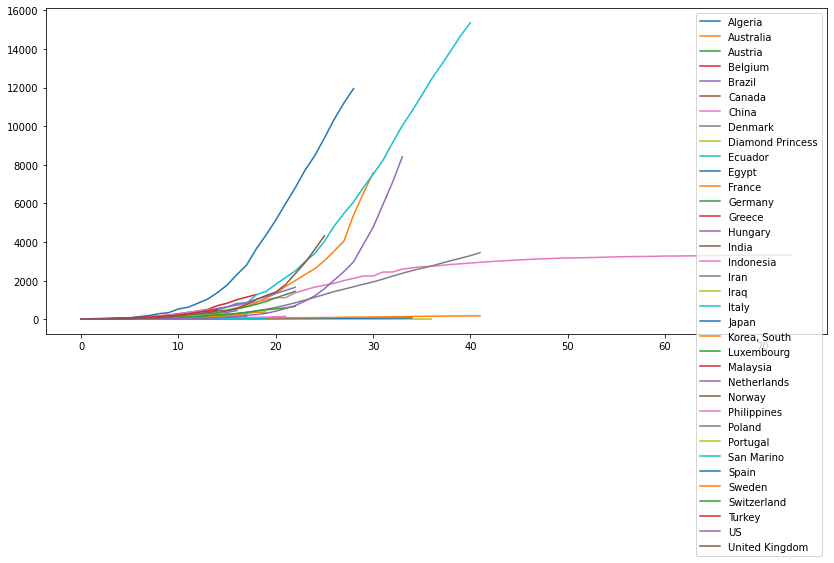

In [7]:
first_case_aligned.plot(figsize=(14,6))

In [8]:
raw_growths = first_case_aligned.pct_change(fill_method=None).iloc[1:]
raw_growths.head()

,Algeria,Australia,Austria,Belgium,Brazil,Canada,China,Denmark,Diamond Princess,Ecuador,...,Philippines,Poland,Portugal,San Marino,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
1,0.285714,0.000000,0.000000,0.400000,0.833333,0.125000,0.058824,0.500000,0.0,1.000000,...,0.375000,0.142857,1.000000,0.000000,0.700000,0.166667,0.181818,2.333333,0.166667,0.333333
2,0.222222,0.166667,0.333333,0.500000,0.363636,0.333333,0.444444,0.444444,0.0,0.285714,...,0.090909,0.250000,0.166667,0.571429,0.647059,0.428571,0.076923,0.233333,0.571429,0.000000
3,0.363636,0.000000,1.000000,0.761905,0.666667,0.583333,0.615385,0.000000,0.0,0.500000,...,0.000000,0.400000,0.642857,0.000000,0.250000,0.100000,0.000000,0.189189,0.090909,0.000000
4,0.133333,0.000000,0.312500,0.810811,0.360000,0.105263,0.333333,0.846154,0.0,0.037037,...,0.583333,0.142857,0.434783,0.272727,0.542857,0.454545,0.928571,0.340909,0.166667,1.625000
5,0.000000,0.000000,0.333333,0.119403,0.352941,0.190476,0.464286,0.333333,0.0,0.214286,...,-0.105263,0.000000,0.303030,0.428571,0.018519,0.250000,0.037037,0.271186,0.214286,0.000000


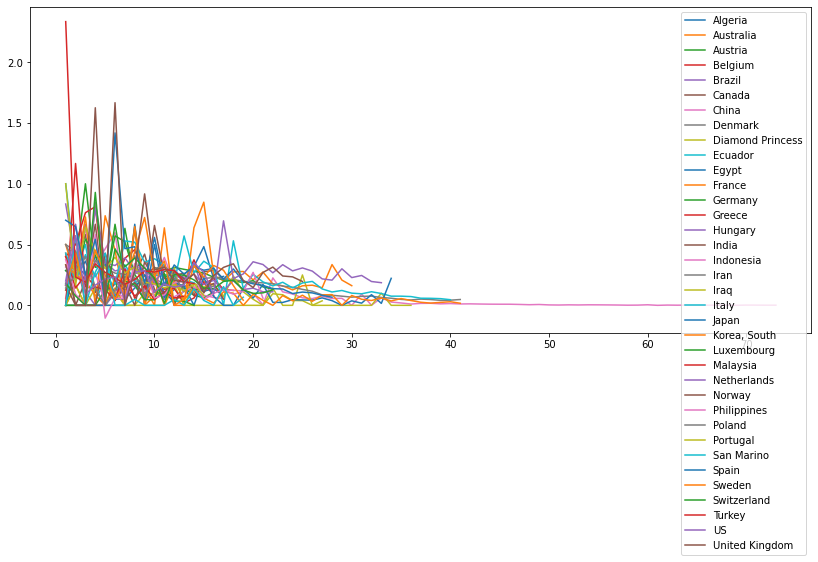

In [9]:
raw_growths.plot(figsize=(14,6))

In [10]:
deaths_ma = first_case_aligned.rolling(5).mean().iloc[4:]
deaths_ma.head()

,Algeria,Australia,Austria,Belgium,Brazil,Canada,China,Denmark,Diamond Princess,Ecuador,...,Philippines,Poland,Portugal,San Marino,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
4,11.8,6.6,11.4,29.8,18.2,13.8,31.8,13.0,6.0,18.8,...,12.4,11.0,17.6,10.0,28.8,10.0,15.8,35.8,10.0,10.2
5,13.8,6.8,15.8,42.8,26.2,17.2,44.8,18.2,6.0,24.2,...,14.2,12.8,25.0,12.6,37.8,12.8,19.2,49.0,12.2,13.2
6,15.8,7.2,20.6,57.6,35.8,20.6,67.4,23.2,6.0,28.6,...,15.6,14.8,34.6,15.2,61.0,15.6,24.8,61.4,15.0,22.8
7,17.8,7.4,28.8,77.8,48.2,24.2,88.8,28.8,6.0,34.6,...,17.0,17.2,47.0,17.0,94.4,18.6,32.8,75.6,17.2,32.4
8,19.8,8.6,37.2,106.0,61.6,28.0,114.6,36.6,6.0,40.8,...,19.6,20.6,62.4,19.0,145.2,23.6,45.0,93.0,20.4,45.2


In [11]:
deaths_ma_growths = deaths_ma.pct_change(fill_method=None).iloc[1:].reset_index(drop=True)
deaths_ma_growths.head()

,Algeria,Australia,Austria,Belgium,Brazil,Canada,China,Denmark,Diamond Princess,Ecuador,...,Philippines,Poland,Portugal,San Marino,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
0,0.169492,0.030303,0.385965,0.436242,0.439560,0.246377,0.408805,0.400000,0.0,0.287234,...,0.145161,0.163636,0.420455,0.260000,0.312500,0.280000,0.215190,0.368715,0.220000,0.294118
1,0.144928,0.058824,0.303797,0.345794,0.366412,0.197674,0.504464,0.274725,0.0,0.181818,...,0.098592,0.156250,0.384000,0.206349,0.613757,0.218750,0.291667,0.253061,0.229508,0.727273
2,0.126582,0.027778,0.398058,0.350694,0.346369,0.174757,0.317507,0.241379,0.0,0.209790,...,0.089744,0.162162,0.358382,0.118421,0.547541,0.192308,0.322581,0.231270,0.146667,0.421053
3,0.112360,0.162162,0.291667,0.362468,0.278008,0.157025,0.290541,0.270833,0.0,0.179191,...,0.152941,0.197674,0.327660,0.117647,0.538136,0.268817,0.371951,0.230159,0.186047,0.395062
4,0.090909,0.139535,0.252688,0.288679,0.250000,0.235714,0.273997,0.224044,0.0,0.156863,...,0.142857,0.165049,0.275641,0.073684,0.396694,0.389831,0.315556,0.234409,0.215686,0.517699


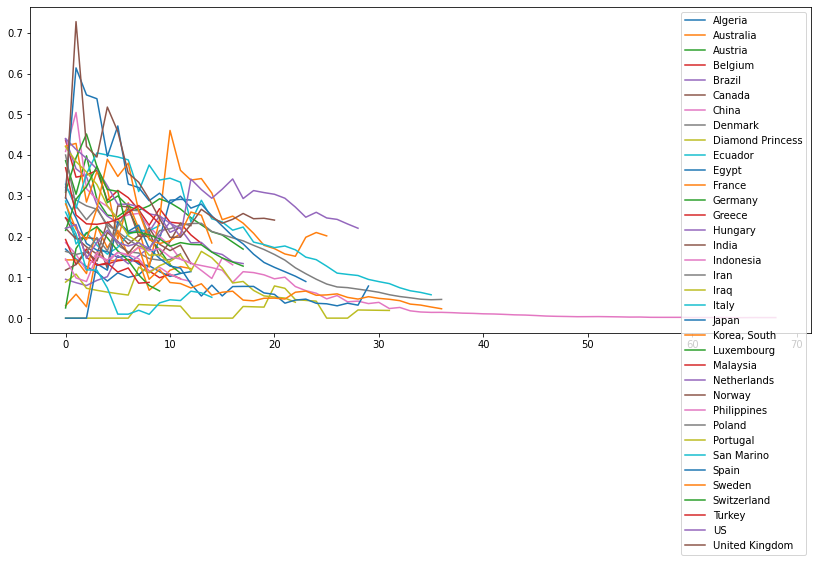

In [12]:
deaths_ma_growths.plot(figsize=(14,6))

## Training

In [13]:
past_week = deaths_ma_growths.iloc[0:7].transpose()
past_week.head()

,0,1,2,3,4,5,6
Algeria,0.169492,0.144928,0.126582,0.112360,0.090909,0.111111,0.100000
Australia,0.030303,0.058824,0.027778,0.162162,0.139535,0.142857,0.142857
Austria,0.385965,0.303797,0.398058,0.291667,0.252688,0.248927,0.268041
Belgium,0.436242,0.345794,0.350694,0.362468,0.288679,0.313324,0.295429
Brazil,0.439560,0.366412,0.346369,0.278008,0.250000,0.233766,0.210526


In [14]:
next_day = deaths_ma_growths.iloc[7]
next_day.head()

Algeria      0.106061
Australia    0.140625
Austria      0.214092
Belgium      0.265921
Brazil       0.215652
Name: 7, dtype: float64

In [15]:
reg_7d = LinearRegression().fit(past_week, next_day)
reg_7d.coef_

array([ 0.03551824,  0.06666652, -0.05342854, -0.06225597, -0.1025281 ,
        0.36972582,  0.48888782])

In [16]:
next_next_day = deaths_ma_growths.iloc[14]
missing = next_next_day.isna()
next_next_day = next_next_day[~missing]
print('Available countries:', len(next_next_day))
next_next_day.head()

Available countries: 17


China               0.123896
Diamond Princess    0.000000
France              0.306867
Germany             0.211877
Iran                0.212625
Name: 14, dtype: float64

In [17]:
next_week = deaths_ma_growths.iloc[7:14].transpose()
next_week = next_week[~missing]
next_week.head()

,7,8,9,10,11,12,13
China,0.256816,0.223933,0.200114,0.178180,0.144359,0.134276,0.128972
Diamond Princess,0.033333,0.032258,0.031250,0.030303,0.029412,0.000000,0.000000
France,0.220524,0.125224,0.243243,0.460358,0.362522,0.338689,0.342295
Germany,0.264762,0.275602,0.292798,0.283105,0.267616,0.246491,0.228829
Iran,0.176768,0.169528,0.214679,0.219033,0.228005,0.232089,0.232596


In [18]:
preds = reg_7d.predict(next_week)
preds, next_next_day.head()

(array([0.13815191, 0.03475165, 0.26791068, 0.20806496, 0.20660887,
        0.14108644, 0.22886122, 0.0867757 , 0.09861898, 0.17338551,
        0.12931731, 0.0848432 , 0.24053249, 0.23682912, 0.17358114,
        0.29027621, 0.23891232]),
 China               0.123896
 Diamond Princess    0.000000
 France              0.306867
 Germany             0.211877
 Iran                0.212625
 Name: 14, dtype: float64)

In [19]:
reg_7d.score(next_week, next_next_day)

0.91828617095488

In [20]:
train_days = 20
train = deaths_ma_growths.iloc[:train_days]
test = deaths_ma_growths.iloc[train_days:]

In [21]:
train_past_weeks = []
train_next_days = []
for day_to_predict in range(7, len(train)):
    series_for_day = [c + '_' + str(day_to_predict) for c in deaths_ma_growths.columns]
    
    past_week_for_day = train.iloc[day_to_predict-7:day_to_predict].reset_index(drop=True)
    past_week_for_day.columns = series_for_day
    train_past_weeks.append(past_week_for_day.transpose())
    
    targets_for_day = train.iloc[day_to_predict]
    targets_for_day.index = series_for_day
    train_next_days.append(targets_for_day)
train_past_weeks = pd.concat(train_past_weeks)
train_next_days = pd.concat(train_next_days)
train_past_weeks

,0,1,2,3,4,5,6
Algeria_7,0.169492,0.144928,0.126582,0.112360,0.090909,0.111111,0.100000
Australia_7,0.030303,0.058824,0.027778,0.162162,0.139535,0.142857,0.142857
Austria_7,0.385965,0.303797,0.398058,0.291667,0.252688,0.248927,0.268041
Belgium_7,0.436242,0.345794,0.350694,0.362468,0.288679,0.313324,0.295429
Brazil_7,0.439560,0.366412,0.346369,0.278008,0.250000,0.233766,0.210526
...,...,...,...,...,...,...,...
Sweden_19,0.260256,0.252289,0.184403,NaN,NaN,NaN,NaN
Switzerland_19,0.180860,0.179926,0.161941,0.147505,0.137524,0.127545,NaN
Turkey_19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US_19,0.341121,0.315331,0.294040,0.316274,0.341369,0.293333,0.312864


In [22]:
train_past_weeks.tail(10)

,0,1,2,3,4,5,6
Philippines_19,0.136076,0.116992,0.097257,0.147727,0.130693,NaN,NaN
Poland_19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Portugal_19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Marino_19,0.066116,0.062016,0.051095,NaN,NaN,NaN,NaN
Spain_19,0.269813,0.279729,0.250986,0.225861,0.200941,0.182088,0.156892
Sweden_19,0.260256,0.252289,0.184403,NaN,NaN,NaN,NaN
Switzerland_19,0.180860,0.179926,0.161941,0.147505,0.137524,0.127545,NaN
Turkey_19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US_19,0.341121,0.315331,0.294040,0.316274,0.341369,0.293333,0.312864
United Kingdom_19,0.229516,0.266952,0.248539,0.232816,0.242406,0.256715,0.243824


In [23]:
train_next_days.head(10)

Algeria_7             0.106061
Australia_7           0.140625
Austria_7             0.214092
Belgium_7             0.265921
Brazil_7              0.215652
Canada_7              0.202429
China_7               0.256816
Denmark_7             0.159609
Diamond Princess_7    0.033333
Ecuador_7             0.215569
dtype: float64

In [24]:
train_next_days.tail(10)

Philippines_19            NaN
Poland_19                 NaN
Portugal_19               NaN
San Marino_19             NaN
Spain_19             0.136615
Sweden_19                 NaN
Switzerland_19            NaN
Turkey_19                 NaN
US_19                0.307955
United Kingdom_19    0.244906
dtype: float64

In [25]:
train_next_days_missing = train_next_days.isna()
train_past_weeks = train_past_weeks[~train_next_days_missing]
train_next_days = train_next_days[~train_next_days_missing]

In [26]:
train_past_weeks.tail(10)

,0,1,2,3,4,5,6
Diamond Princess_19,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.027778
France_19,0.338689,0.342295,0.306867,0.241379,0.250220,0.232940,0.208095
Iran_19,0.232089,0.232596,0.212625,0.204932,0.196908,0.189590,0.178537
Iraq_19,0.115385,0.163793,0.148148,0.122581,0.086207,0.089947,0.067961
Italy_19,0.235714,0.289017,0.243647,0.235978,0.215721,0.223437,0.186553
Japan_19,0.084034,0.054264,0.080882,0.054422,0.077419,0.077844,0.077778
"Korea, South_19",0.074074,0.084291,0.056537,0.063545,0.066038,0.044248,0.042373
Spain_19,0.269813,0.279729,0.250986,0.225861,0.200941,0.182088,0.156892
US_19,0.341121,0.315331,0.294040,0.316274,0.341369,0.293333,0.312864
United Kingdom_19,0.229516,0.266952,0.248539,0.232816,0.242406,0.256715,0.243824


In [27]:
train_next_days.tail(10)

Diamond Princess_19    0.027027
France_19              0.178643
Iran_19                0.168293
Iraq_19                0.054545
Italy_19               0.180366
Japan_19               0.061856
Korea, South_19        0.048780
Spain_19               0.136615
US_19                  0.307955
United Kingdom_19      0.244906
dtype: float64

In [28]:
def explode_prediction_data(data):
    past_weeks = []
    next_days = []
    for day_to_predict in range(7, len(data)):
        series_for_day = [c + '_' + str(day_to_predict) for c in data.columns]

        past_week_for_day = data.iloc[day_to_predict-7:day_to_predict].reset_index(drop=True)
        past_week_for_day.columns = series_for_day
        past_weeks.append(past_week_for_day.transpose())

        targets_for_day = data.iloc[day_to_predict]
        targets_for_day.index = series_for_day
        next_days.append(targets_for_day)
    
    past_weeks = pd.concat(past_weeks)
    next_days = pd.concat(next_days)
    
    next_days_missing = next_days.isna()
    past_weeks = past_weeks[~next_days_missing]
    next_days = next_days[~next_days_missing]
    
    return (past_weeks, next_days)

In [29]:
tpw, tnd = explode_prediction_data(train)
tpw.tail(10)

,0,1,2,3,4,5,6
Diamond Princess_19,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.027778
France_19,0.338689,0.342295,0.306867,0.241379,0.250220,0.232940,0.208095
Iran_19,0.232089,0.232596,0.212625,0.204932,0.196908,0.189590,0.178537
Iraq_19,0.115385,0.163793,0.148148,0.122581,0.086207,0.089947,0.067961
Italy_19,0.235714,0.289017,0.243647,0.235978,0.215721,0.223437,0.186553
Japan_19,0.084034,0.054264,0.080882,0.054422,0.077419,0.077844,0.077778
"Korea, South_19",0.074074,0.084291,0.056537,0.063545,0.066038,0.044248,0.042373
Spain_19,0.269813,0.279729,0.250986,0.225861,0.200941,0.182088,0.156892
US_19,0.341121,0.315331,0.294040,0.316274,0.341369,0.293333,0.312864
United Kingdom_19,0.229516,0.266952,0.248539,0.232816,0.242406,0.256715,0.243824


In [30]:
tnd.tail(10)

Diamond Princess_19    0.027027
France_19              0.178643
Iran_19                0.168293
Iraq_19                0.054545
Italy_19               0.180366
Japan_19               0.061856
Korea, South_19        0.048780
Spain_19               0.136615
US_19                  0.307955
United Kingdom_19      0.244906
dtype: float64

In [31]:
reg = LinearRegression().fit(*explode_prediction_data(train))
reg.coef_

array([-0.02964286,  0.21890443, -0.23373596, -0.00244457,  0.05455709,
       -0.01411879,  0.9051853 ])

## Evaluation

In [32]:
test_past_weeks, test_next_days = explode_prediction_data(test)
test_past_weeks.tail(10)

,0,1,2,3,4,5,6
China_39,0.003482,0.003098,0.002594,0.002711,0.002028,0.001962,0.001958
China_40,0.003098,0.002594,0.002711,0.002028,0.001962,0.001958,0.001954
China_41,0.002594,0.002711,0.002028,0.001962,0.001958,0.001954,0.001341
China_42,0.002711,0.002028,0.001962,0.001958,0.001954,0.001341,0.001522
China_43,0.002028,0.001962,0.001958,0.001954,0.001341,0.001522,0.001398
China_44,0.001962,0.001958,0.001954,0.001341,0.001522,0.001398,0.001396
China_45,0.001958,0.001954,0.001341,0.001522,0.001398,0.001396,0.001091
China_46,0.001954,0.001341,0.001522,0.001398,0.001396,0.001091,0.001211
China_47,0.001341,0.001522,0.001398,0.001396,0.001091,0.001211,0.001391
China_48,0.001522,0.001398,0.001396,0.001091,0.001211,0.001391,0.001329


In [33]:
test_next_days.tail(10)

China_39    0.001954
China_40    0.001341
China_41    0.001522
China_42    0.001398
China_43    0.001396
China_44    0.001091
China_45    0.001211
China_46    0.001391
China_47    0.001329
China_48    0.001327
dtype: float64

In [57]:
test_preds = reg.predict(test_past_weeks)
len(test_preds)

81

In [35]:
print('R^2:', reg.score(test_past_weeks, test_next_days))
print('MSE:', mean_squared_error(test_next_days, test_preds))

R^2: 0.9228458123776675
MSE: 0.00013270201048691933


## Plotting predictions

In [50]:
sample_country = 'Spain'

In [51]:
predicted_growths = deaths_ma_growths[sample_country].iloc[:7]
predicted_growths.head(10)

0    0.312500
1    0.613757
2    0.547541
3    0.538136
4    0.396694
5    0.471400
6    0.328418
Name: Spain, dtype: float64

In [52]:
for day in range(30):
    pred_inputs = predicted_growths.iloc[-7:].transpose()
    pred = reg.predict(np.expand_dims(pred_inputs.values, 0))[0]
    predicted_growths[len(predicted_growths)] = pred

In [53]:
predicted_growths.head(10)

0    0.312500
1    0.613757
2    0.547541
3    0.538136
4    0.396694
5    0.471400
6    0.328418
7    0.319022
8    0.295729
9    0.299759
Name: Spain, dtype: float64

In [54]:
real_vals = first_case_aligned[sample_country].iloc[:37]
# real_vals = deaths_ma_growths[sample_country].iloc[:37]
real_vals.tail(15)

22     6803.0
23     7716.0
24     8464.0
25     9387.0
26    10348.0
27    11198.0
28    11947.0
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
Name: Spain, dtype: float64

In [55]:
predicted_vals = pd.concat([pd.Series(real_vals.iloc[0]), predicted_growths.copy() + 1]).cumprod()
# predicted_vals = predicted_growths.copy()
predicted_vals.head()

0    10.000000
0    13.125000
1    21.180556
2    32.777778
3    50.416667
dtype: float64

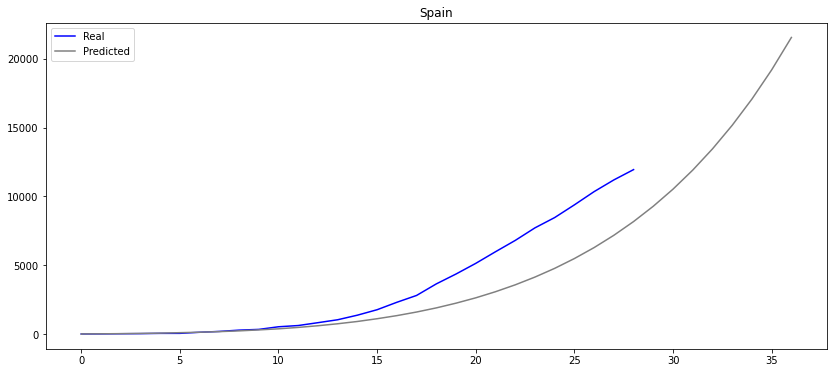

In [58]:
plt.figure(figsize=(14,6))
real_ax = real_vals.plot(color='blue', label='Real')
pred_ax = predicted_vals.plot(color='grey', label='Predicted')


plt.legend(loc=2)
plt.title(sample_country)
plt.show()

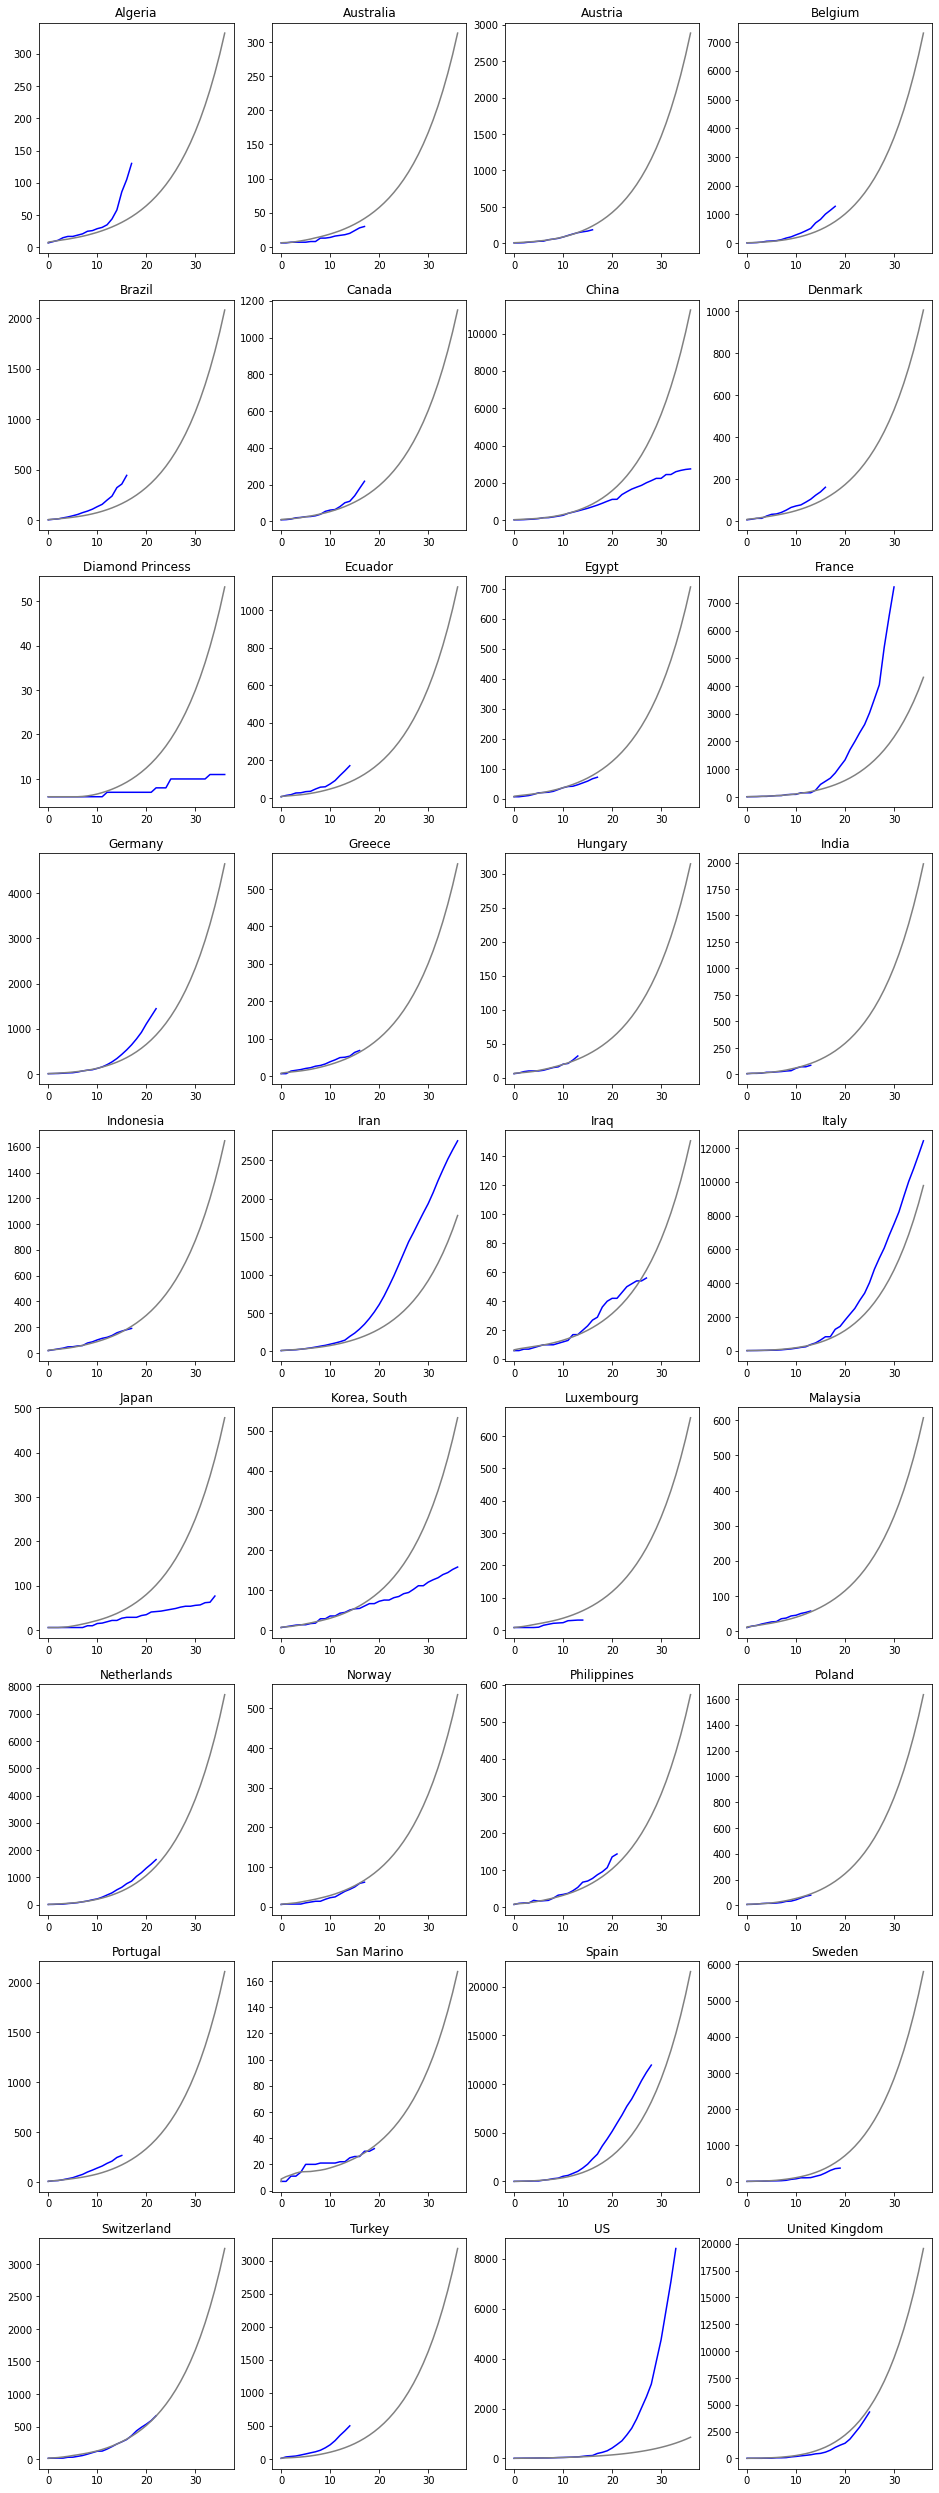

In [88]:
plot_cols = 4
plot_rows = math.ceil(len(deaths_ma_growths.columns) / 4.)
fig, axs = plt.subplots(plot_rows, plot_cols)
fig.set_size_inches(16, plot_rows * 5)
axs = np.reshape(axs, -1)
for idx, country in enumerate(deaths_ma_growths.columns):
    predicted_growths = deaths_ma_growths[country].iloc[:7]
    for day in range(30):
        pred_inputs = predicted_growths.iloc[-7:].transpose()
        pred = reg.predict(np.expand_dims(pred_inputs.values, 0))[0]
        predicted_growths[len(predicted_growths)] = pred
    real_vals = first_case_aligned[country].iloc[:37]
    # real_vals = deaths_ma_growths[country].iloc[:37]
    predicted_vals = pd.concat([pd.Series(real_vals.iloc[0]), predicted_growths.copy() + 1]).cumprod()
    # predicted_vals = predicted_growths.copy()
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        axs[idx].set_title(country)
        real_vals.plot(color='blue', label='Real', ax=axs[idx])
        predicted_vals.plot(color='grey', label='Predicted', ax=axs[idx])

plt.show()